In [26]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt 
%matplotlib inline
import matplotlib as mpl  
import seaborn as sns 
mpl.rcParams['figure.dpi'] = 400  
from sklearn.preprocessing import StandardScaler
from tensorflow import random

In [27]:
df = pd.read_csv('Chapter_1_cleaned_data.csv')

In [28]:
df.shape

(26664, 30)

In [29]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,0,0,0,1


In [30]:
features_response = df.columns.tolist()

In [31]:
items_to_remove = ['ID', 'SEX', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
                   'PAY_6', 'EDUCATION_CAT', 'graduate school',
                   'high school', 'none','others', 'university']

In [32]:
features_response = [item for item in features_response
                     if item not in items_to_remove]
features_response

['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

In [33]:
features = features_response[:-1]
features

['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6']

In [34]:
len(features)

17

In [35]:
X = df[features]

In [36]:
y = df['default payment next month'] 

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
seed = 1
np.random.seed(seed)
random.set_seed(seed)
sc = StandardScaler()
X = pd.DataFrame(sc.fit_transform(X), columns=X.columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

In [39]:
from keras.models import Sequential
from keras.layers import Dense

In [40]:
model = Sequential()
model.add(Dense(16, input_dim=len(features), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [41]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [42]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3)

In [43]:
model.fit(X_train, y_train, epochs=40, batch_size=100)

2023-01-26 13:20:31.804665: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/40
187/187 [==============================] - 1s 1ms/step - loss: 0.5497 - accuracy: 0.7447
Epoch 2/40
187/187 [==============================] - 0s 1ms/step - loss: 0.4848 - accuracy: 0.7999
Epoch 3/40
187/187 [==============================] - 0s 1ms/step - loss: 0.4653 - accuracy: 0.8168
Epoch 4/40
187/187 [==============================] - 0s 1ms/step - loss: 0.4562 - accuracy: 0.8184
Epoch 5/40
187/187 [==============================] - 0s 1ms/step - loss: 0.4516 - accuracy: 0.8194
Epoch 6/40
187/187 [==============================] - 0s 1ms/step - loss: 0.4482 - accuracy: 0.8205
Epoch 7/40
187/187 [==============================] - 0s 1ms/step - loss: 0.4460 - accuracy: 0.8201
Epoch 8/40
187/187 [==============================] - 0s 1ms/step - loss: 0.4441 - accuracy: 0.8204
Epoch 9/40
187/187 [==============================] - 0s 1ms/step - loss: 0.4432 - accuracy: 0.8203
Epoch 10/40
187/187 [==============================] - 0s 1ms/step - loss: 0.4417 - accuracy: 0.8205

In [44]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [45]:
in_sample_preds = [round(x[0]) for x in model.predict(X_train)]
out_sample_preds = [round(x[0]) for x in model.predict(X_test)]

In [46]:
print('In-Sample Accuracy: %0.4f' % accuracy_score(y_train, in_sample_preds))
print('Out-of-Sample Accuracy: %0.4f' % accuracy_score(y_test, out_sample_preds))

print('\n')

print('In-Sample Precision: %0.4f' % precision_score(y_train, in_sample_preds))
print('Out-of-Sample Precision: %0.4f' % precision_score(y_test, out_sample_preds))

print('\n')

print('In-Sample Recall: %0.4f' % recall_score(y_train, in_sample_preds))
print('Out-of-Sample Recall: %0.4f' % recall_score(y_test, out_sample_preds))

In-Sample Accuracy: 0.8217
Out-of-Sample Accuracy: 0.8143


In-Sample Precision: 0.7003
Out-of-Sample Precision: 0.6798


In-Sample Recall: 0.3385
Out-of-Sample Recall: 0.3184


In [48]:
from sklearn.metrics import roc_curve, auc

In [49]:
in_sample_preds = [x[0] for x in model.predict(X_train)]
out_sample_preds = [x[0] for x in model.predict(X_test)]

In [50]:
in_sample_fpr, in_sample_tpr, in_sample_thresholds = roc_curve(y_train, in_sample_preds)
out_sample_fpr, out_sample_tpr, out_sample_thresholds = roc_curve(y_test, out_sample_preds)

In [51]:
in_sample_roc_auc = auc(in_sample_fpr, in_sample_tpr)
out_sample_roc_auc = auc(out_sample_fpr, out_sample_tpr)

print('In-Sample AUC: %0.4f' % in_sample_roc_auc)
print('Out-Sample AUC: %0.4f' % out_sample_roc_auc)

In-Sample AUC: 0.7766
Out-Sample AUC: 0.7657


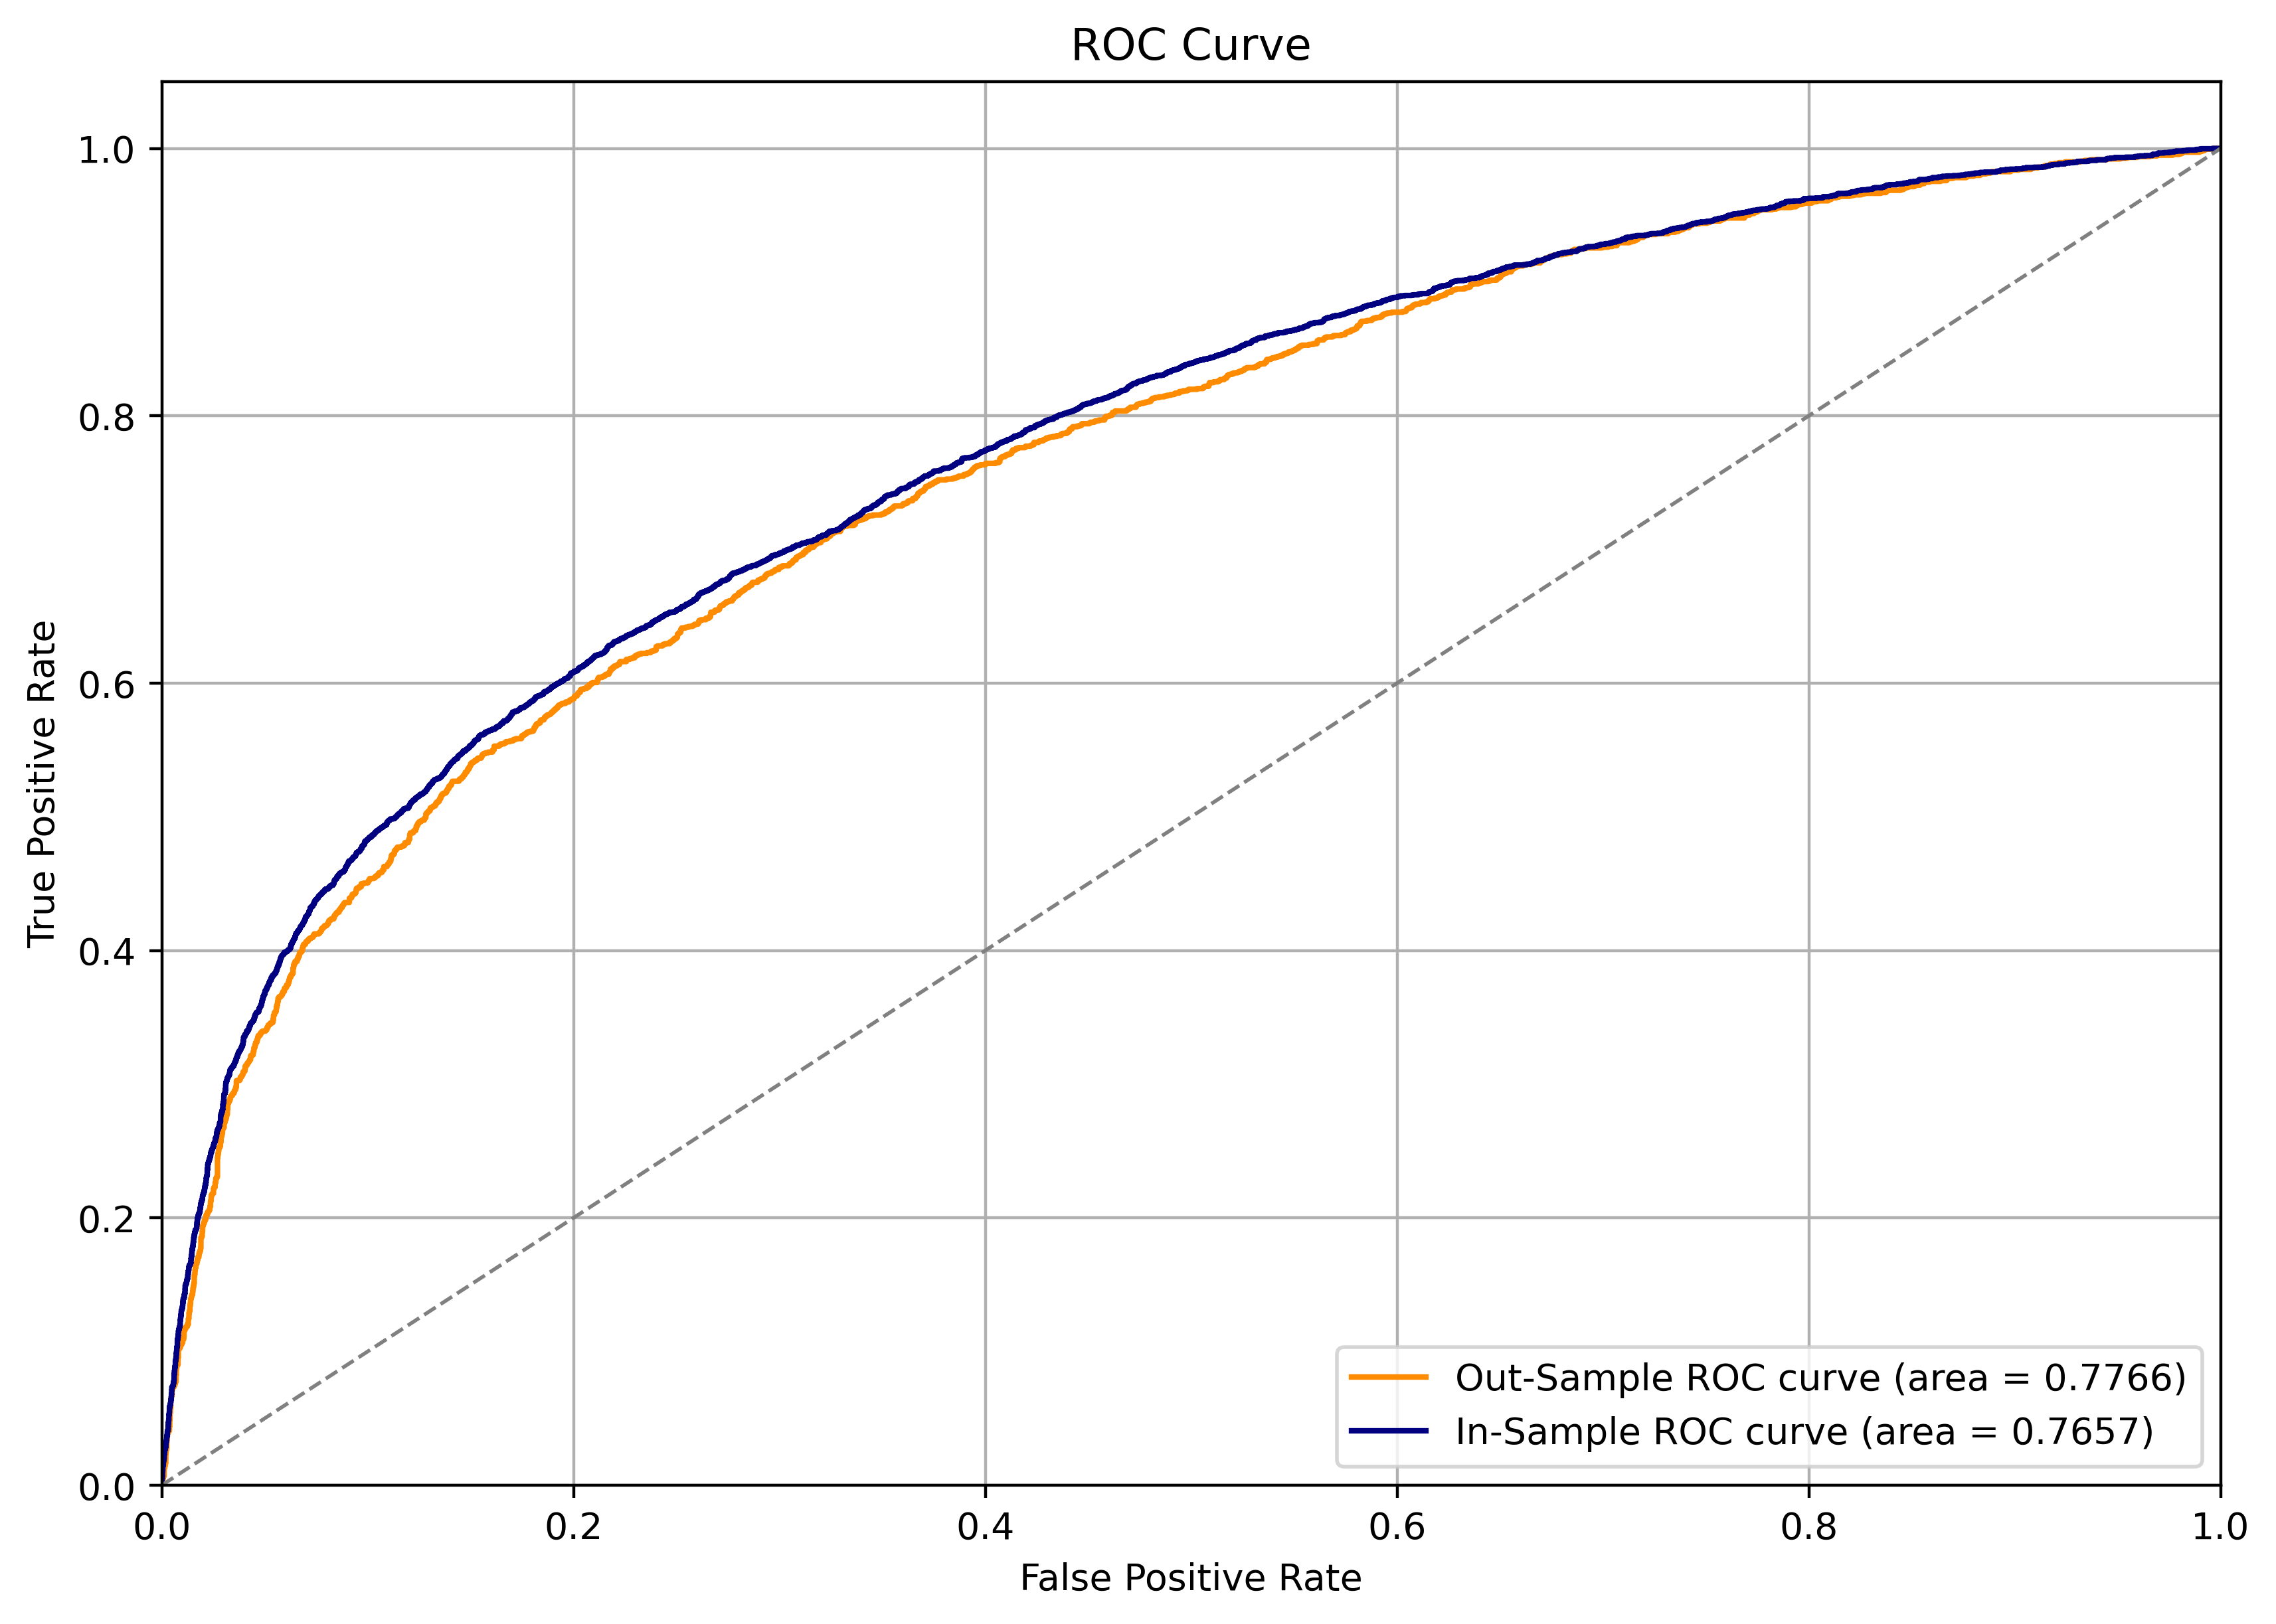

In [52]:
plt.figure(figsize=(10,7))

plt.plot(
    out_sample_fpr, out_sample_tpr, color='darkorange', label='Out-Sample ROC curve (area = %0.4f)' % in_sample_roc_auc
)
plt.plot(
    in_sample_fpr, in_sample_tpr, color='navy', label='In-Sample ROC curve (area = %0.4f)' % out_sample_roc_auc
)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.grid()
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")

plt.show()